In [1]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import matplotlib.pyplot as plt

# Code `get_data()`

## Create _draft code_ in the notebook

In [2]:
# Where am I?
os.getcwd()

'/Users/francoisgirard/code/francoisgirard51/04-Decision-Science/01-Project-Setup/data-olist_data_metric'

In [3]:
import os
import pandas as pd

# Build relative path to csv folder 
csv_path = '/home/vincent/code/vtmoreau/04-Decision-Sicence/01-Project-Setup/data-context-and-setup/data/csv' # Bad practice!
csv_path = '../data-context-and-setup/data/csv' # Mac OS / Ubuntu only
csv_path = '..\\data-context-and-setup\\data\\csv' # Windows only
csv_path = os.path.join('..', 'data-context-and-setup','data','csv') # Robust to Linux/OS/Windows variations

csv_path

'../data-context-and-setup/data/csv'

In [4]:
file_names = [f for f in os.listdir(csv_path) if f.endswith('.csv')]
file_names

['olist_sellers_dataset.csv',
 'product_category_name_translation.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv']

In [5]:
#.strip() or .replace()
key_names = [key_name
    .replace('olist_','')
    .replace('_dataset','')
    .replace('.csv','')
    for key_name in file_names]
key_names

['sellers',
 'product_category_name_translation',
 'orders',
 'order_items',
 'customers',
 'geolocation',
 'order_payments',
 'order_reviews',
 'products']

In [6]:
# How to iterate over two list simulatenously ? 
# Let's discover how zip works :

l1 = ['a','b','c']
l2 = [1,2,3]
list(zip(l1,l2))

[('a', 1), ('b', 2), ('c', 3)]

In [7]:
# Create the dictionary

data = {}

for (k, f) in zip(key_names, file_names):
    data[k] = pd.read_csv(os.path.join(csv_path, f))

data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


## Transfer logic to `olist/data.py` 🐍

When you call a function that you will name `get_data` from `olist/data.py`, it should return the dictionary `data`:with key/value pairs `"name of the dataset":"dataset.csv"`

```python
from olist.data import Olist
Olist().get_data()
```
- Take your time to understand what happens when calling `Olist().get_data()`
- Your method `get_data()` needs to be callable from various places (e.g your Terminal, this notebook, another notebook located elsewhere, etc...)
- You can't use a relative path this time as the current working directory `os.getcwd()` depends on where you run the code in the first place


In [8]:
# Test your code
from olist.data import Olist
Olist().get_data().keys()

dict_keys(['sellers', 'product_category_name_translation', 'orders', 'order_items', 'customers', 'geolocation', 'order_payments', 'order_reviews', 'products'])

# Let's build a business metric: `Weekly Sales` 📈

<img src="https://wagon-public-datasets.s3.amazonaws.com/04-Decision-Science/01-Project-Setup/olist_schema.png" width=1000>

**Goal**: Plot the weekly sum of `payment_value` for delivered orders

1️⃣ **Step 1**: Pseudo code your process in English below before actually coding

2️⃣ **Step 2**: Code your logic

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
orders = pd.read_csv('/Users/francoisgirard/code/francoisgirard51/04-Decision-Science/01-Project-Setup/data-context-and-setup/data/csv/olist_orders_dataset.csv')
order_items = pd.read_csv('/Users/francoisgirard/code/francoisgirard51/04-Decision-Science/01-Project-Setup/data-context-and-setup/data/csv/olist_order_items_dataset.csv')

# Join orders and order_items on order_id
merged_data = pd.merge(orders, order_items, on='order_id', how='inner')

# Convert the purchase timestamp column to datetime
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

# Extract week from the purchase timestamp
merged_data['week'] = merged_data['order_purchase_timestamp'].dt.isocalendar().week

# Group by week and sum the prices to get weekly sales
weekly_sales = merged_data.groupby('week')['price'].sum()

weekly_sales.plot(kind='line', figsize=(12, 6))
plt.title('Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Sales Value')
plt.grid(True)
plt.show()

⌛️ Do not forget to handle `datetime` properly.

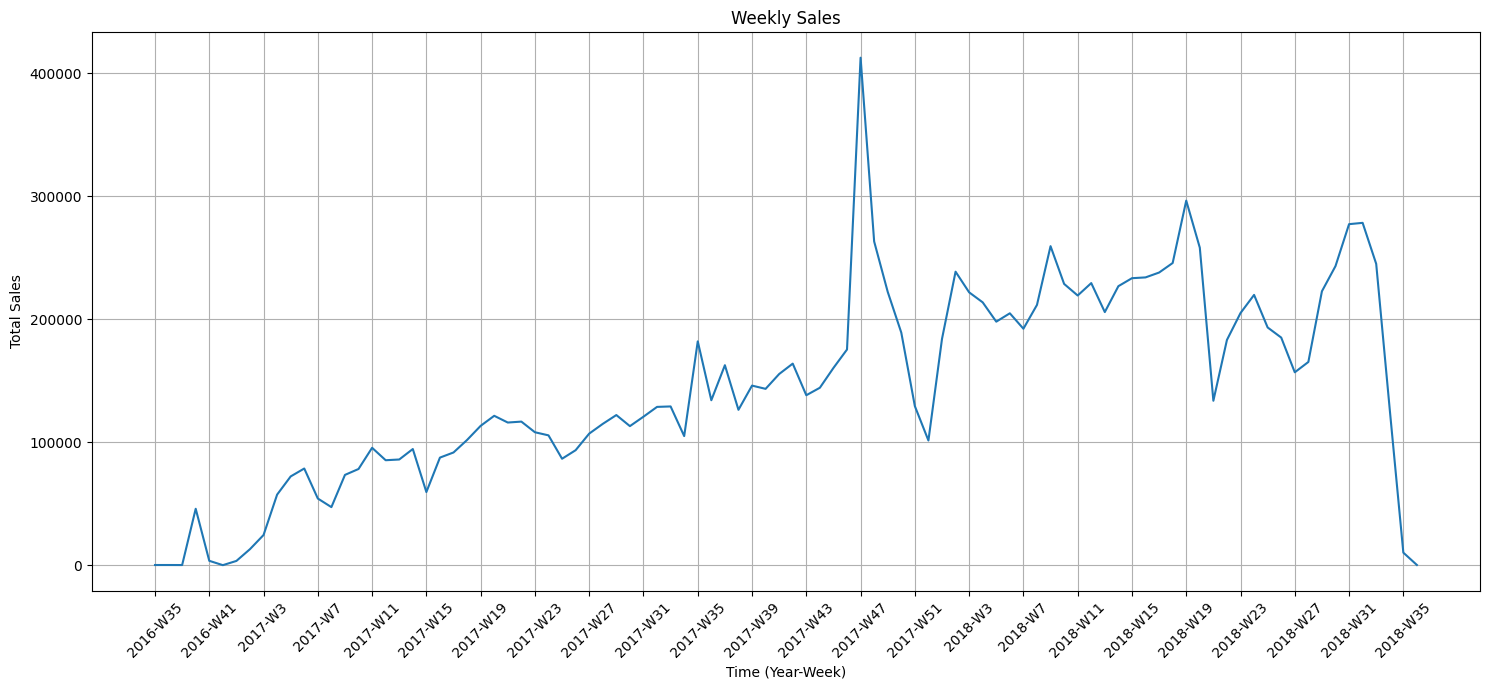

In [26]:
# Merge the orders and order_items dataframes using the 'order_id' column
merged_data = orders.merge(order_items, on='order_id')

# Convert 'order_purchase_timestamp' to datetime format
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

# Handle potential time zone differences (assuming data is in UTC, you can adjust as necessary)
merged_data['order_purchase_timestamp'] = merged_data['order_purchase_timestamp'].dt.tz_localize('UTC').dt.tz_convert('America/Sao_Paulo')

# Extract year and week for better granularity
merged_data['year'] = merged_data['order_purchase_timestamp'].dt.year
merged_data['week'] = merged_data['order_purchase_timestamp'].dt.isocalendar().week

# Group by 'year' and 'week', then sum the 'price' column to get total sales for each week
weekly_sales = merged_data.groupby(['year', 'week']).agg({'price': 'sum'}).reset_index()

plt.figure(figsize=(15,7))
plt.plot(weekly_sales['price'])
plt.title("Weekly Sales")
plt.xlabel("Time (Year-Week)")
plt.xticks(ticks=range(0, len(weekly_sales), 4), labels=[f"{row['year']}-W{row['week']}" for _, row in weekly_sales.iloc[::4, :].iterrows()], rotation=45)
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

👉 Set the `order_purchase_timestamp` as the index

In [34]:
import pandas as pd

# Read the CSV file, parsing 'order_purchase_timestamp' as a date
df = pd.read_csv('/Users/francoisgirard/code/francoisgirard51/04-Decision-Science/01-Project-Setup/data-context-and-setup/data/csv/olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp'])

# Set 'order_purchase_timestamp' as the index
df.set_index('order_purchase_timestamp', inplace=True)

# Display the first few rows to check
print(df.head())

                                                  order_id  \
order_purchase_timestamp                                     
2017-10-02 10:56:33       e481f51cbdc54678b7cc49136f2d6af7   
2018-07-24 20:41:37       53cdb2fc8bc7dce0b6741e2150273451   
2018-08-08 08:38:49       47770eb9100c2d0c44946d9cf07ec65d   
2017-11-18 19:28:06       949d5b44dbf5de918fe9c16f97b45f8a   
2018-02-13 21:18:39       ad21c59c0840e6cb83a9ceb5573f8159   

                                               customer_id order_status  \
order_purchase_timestamp                                                  
2017-10-02 10:56:33       9ef432eb6251297304e76186b10a928d    delivered   
2018-07-24 20:41:37       b0830fb4747a6c6d20dea0b8c802d7ef    delivered   
2018-08-08 08:38:49       41ce2a54c0b03bf3443c3d931a367089    delivered   
2017-11-18 19:28:06       f88197465ea7920adcdbec7375364d82    delivered   
2018-02-13 21:18:39       8ab97904e6daea8866dbdbc4fb7aad2c    delivered   

                            order_appro

👉 You can now resample this dataset to compute metrics on a weekly basis.

In [35]:
# Resampling the dataset to get the count of orders per week
weekly_orders = df.resample('W').size()

print(weekly_orders.head())

order_purchase_timestamp
2016-09-04    1
2016-09-11    1
2016-09-18    2
2016-09-25    0
2016-10-02    1
Freq: W-SUN, dtype: int64


📈 Plot the weekly payment values to get a big picture of Olist's revenues.